In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Discussion 5: Sampling and Regression

[link](https://online.stat.psu.edu/stat501/lesson/9/9.8)

## 1. Data Collection Through Sampling

It’s time for the Data 100 midterm, and the professors want to estimate the difficulty of the
exam. They decide to survey students on the exam’s difficulty with a 10-point scale and then use
the mean of the students’ responses as the estimate.

**(a) What is the population the professors are interested in trying to understand?**

&emsp;A. Students in Data 100

&emsp;B. Students enrolled in the Data 100 Ed
    
&emsp;C. Students who attend the Data 100 lectures

&emsp;D. Students who took the Data 100 midterm

In [2]:
q1a = ...
q1a

Ellipsis

**(b) The professors consider a few different methods for collecting the survey data. Which of the following methods is best? (think through which considerations go into "best")**

&emsp;A. The professors send a Zoom poll to all students in the first weekly live session following the exam.
    
&emsp;B. The professors add a question to the homework assignments of a simple random sample of anonymous students within every discussion section.
    
&emsp;C. The professors make a post on Ed asking students to submit a Google Form containing the survey question.
    
&emsp;D. The professors choose a simple random sample of discussion sections, go to each selected section, and ask each student in the group as part of the final discussion question.


In [3]:
q1b = ...
q1b

Ellipsis

## 2. Simple Linear Regression

A UC Berkeley College of Chemistry student was watching his favorite chemistry Youtuber
[NileRed](https://www.youtube.com/watch?v=zFZ5jQ0yuNA) experimenting with turning gloves into grape soda and wanted to try it themselves. The
experiment was done at various different temperatures and yielded various different amounts of
grape soda. Since this reaction is very costly, they were only able to do it 15 times. This data
set of size $n = 15$ (Yield data) contains measurements of yield from an experiment done at five
different temperature levels. The variables are $y$ = **yield in liters** and $x$ = **temperature in degrees
Fahrenheit**. Below is a scatter plot of our data.

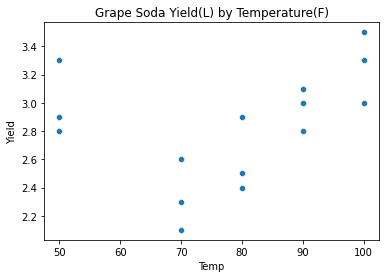

In [4]:
df = pd.read_csv("yield.txt", sep="\t", encoding="UTF-16")

sns.scatterplot(data=df, x="Temp", y="Yield")
plt.title("Grape Soda Yield(L) by Temperature(F)");

<center>
    <table>
        <tr>
            <th>$\sigma_x$</th>
            <th>$\sigma_y$</th>
            <th>$r$</th>
            <th>$\bar{x}$</th>
            <th>$\bar{y}$</th>
        </tr>
        <tr>
            <td>$17.20$</td>
            <td>$0.38$</td>
            <td>$0.30$</td>
            <td>$78.00$</td>
            <td>$2.83$</td>
        </tr>
    </table>
</center>

**(a) Given the above statistics, calculate the slope ($\hat{θ}_1$) and y-intercept ($\hat{θ}_0$) of the line of best fit
using Mean Squared Error (MSE) as our loss function and plot the line on the graph above:**

<center>$y = \hat{θ}_0 + \hat{θ}_1x$</center>


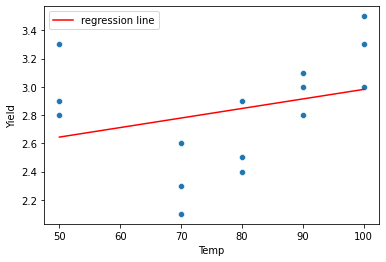

In [5]:
r = np.corrcoef(x=df["Temp"],y=df["Yield"])[0][1]
x = df["Temp"]
y = df["Yield"]
sd_x = np.std(x)
sd_y = np.std(y)
theta_1 = r * sd_y / sd_x
theta_0 = np.mean(y) - theta_1 * np.mean(x)
reg_y = theta_1 * x + theta_0;

plt.plot(x, reg_y, '-r', label='regression line')
sns.scatterplot(data= df,x="Temp",y="Yield");

<img src="regression_formulas.png"></img>

**(b) Plot the residuals from the line of best fit you calculated in part (a). What does the residual plot tell us about the relationship between x and y?**


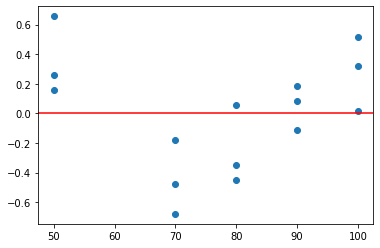

In [6]:
plt.axhline(y=0, color = "red")
plt.scatter(x, y - reg_y, label='regression line');

**(c) Which of the following relations most closely represent the relationship we see between Temperature ($x$) and Yield ($y$)?**

A. $y = \theta_2x^2$

B. $y = \theta_2x^2 + \theta_1x + \theta_0$

C. $y = \theta_1 \log x + \theta_0$

D. $y = \theta_1x + \theta_0$

In [7]:
q2c = ...
q2c

Ellipsis

## 3. Data Collection through Sampling

In the lecture, we derived the estimating equations for SLR, which we obtained by differentiat-
ing the MSE with respect to $\theta_0$ and $\theta_1$. Now, suppose that we choose the same model, $\hat{y} = \theta_0 +\theta_1x$,
but we minimize the L1 loss instead. That is, we minimize the Mean Absolute Error (MAE), defined as
<center>$\hat{R}(\theta_0,\theta_1) = \frac{1}{n}\sum_{i=1}^{n}|y_i - \theta_0 - \theta_1 x_i|$ </center>

**(a) Show that the partial derivatives of $|y_i - \theta_0 - \theta_1 x_i|$ with respect to $\theta_0$ and $\theta_1$ are:**

<center>$\frac{\partial}{\partial \theta_0}|y_i - \theta_0 - \theta_1 x_i| = -sign(y_i - \theta_0 - \theta_1 x_i)$</center>

<center>$\frac{\partial}{\partial \theta_1}|y_i - \theta_0 - \theta_1 x_i| = -x_i \cdot sign(y_i - \theta_0 - \theta_1 x_i)$</center>

**and undefined if $y_i = \theta_0 + \theta_1 x_i$, where sign is the sign function defined by:**

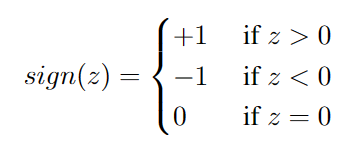

**Note: Although the derivative of the MAE function at 0 is undefined, you can use the default
value of 0 for the partial derivative of MAE(0) with respect to both $\theta_0$ and $\theta_1$.**

**(b) (Bonus) Show that the number of points with negative residuals is the same as the number of
points with positive residuals.**

*Hint: Find the partial derivative of the loss function with respect to $\theta_0$ and set it to 0. What
do you observe?*

**(c) (Bonus) We can often check how sensitive a model is based on estimating equations. That
is, how will the estimators $\theta_0$ and $\theta_1$ change when an outlier is introduced. Based on the
estimating equations of the linear regression with L2 loss from class:**

<center>$\sum_{i=1}^{n}y_i - \hat{y}_i = 0$<br>$\sum_{i=1}^{n}(y_i - \hat{y}_i)x_i = 0$</center>

**What do you think will happen to $\theta_0$ and $\theta_1$ if we take a single yi value and make it larger and
larger while holding all the other $x$ and $y$ values fixed? Consider the three options for what
might happen:**

1. $\theta_0$ and $\theta_1$ would not change at all.
2. $\theta_0$ and $\theta_1$ would change somewhat, but there is a limit to how much they change.
3. $\theta_0$ and $\theta_1$ can change more and more as we change yi more and 
more, without any limit.

**You may assume that $x_i \neq \bar{x}$. Explain your answer. If which one of (i)-(iii) happens depends
on the data y and x, explain what it depends on (but you do not have to give necessary and
sufficient conditions).**


**(d) (Bonus) On the other hand, what do you think would happen to $\theta_0$ and $\theta_1$ for L1-loss linear
regression if we take a single value of $y_i$ and make it larger and larger while holding all the
other $x$ and $y$ values fixed? Among the three options for what might happen listed above, what
do you think would happen? Explain your answer. If which one of (i)-(iii) happens depends
on the data $y$ and $x$, discuss what it depends on (but you do not have to give necessary and
sufficient conditions). The estimating equations are written below again for reference:**

<center>$\frac{1}{n}\sum_{i=1}^{n}-sign(y_i - \theta_0 - \theta_1 x_i) = 0$</center>

<center>$\frac{1}{n}\sum_{i=1}^{n}-x_i \cdot sign(y_i - \theta_0 - \theta_1 x_i) = 0$</center>